## <b>Weather forecast project 

# <b>07 - DISCUSSION AND CONCLUSION

# Rain in Australia
---
#### Dataset source:
data_features.csv

#### Contexte:
brève description du notebook :

> <div class= "alert alert-block alert-info"> <b>L'objectif de ce notebook est d'interpréter les résultats des modèles plus complexes réalisés au cours des notebooks précédents.
</div>

# [Table of contents](#0)<a name="0"></a> 
1. [Régression Logistique ](#1)
2. [Random Forest Classifier](#2)
3. [XGBOOST](#3)
4. [Réseau de neurones](#4)

#### Packages nécessaires au notebook :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly
import sys
import geopy.distance
from collections import defaultdict
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.neighbors import DistanceMetric
from math import radians
from tqdm import tqdm
tqdm.pandas()
import pickle
import time
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, validation_curve
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression,f_classif,chi2
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score



import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

plt.rcParams['figure.figsize'] = [15, 10]

import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

import xgboost as xgb
from xgboost import XGBClassifier

np.random.seed(0)

from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier


In [2]:
url = "https://raw.githubusercontent.com/WeatherForecasterTeam/australia_weather_forecasts/main/data/data_features.csv"
df = pd.read_csv(url, index_col=0)

In [4]:
X = df.drop(['raintomorrow'],axis=1)
y = df['raintomorrow']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# 1.Régression Logistique<a name="1"></a>
[return to the plan](#0)  

> 1.1 [Interprétation avec Statsmodels.api](#1.1) 

## 1.1 Interprétation avec Statsmodels.api <a name="1.1"></a>
[return to the plan](#1)  

Utilisation de la libraie statsmodels.api pour obtenir les coefficients de la régression logistique.

In [6]:
import statsmodels.api as sm
lr_model=sm.OLS(y,X)
result=lr_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.392     
Dependent Variable:     raintomorrow     AIC:                         36934.5619
Date:                   2023-06-04 18:02 BIC:                         37146.0283
No. Observations:       72707            Log-Likelihood:              -18444.   
Df Model:               23               F-statistic:                 2036.     
Df Residuals:           72684            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.392            Scale:                       0.097276  
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
sunshine            -0.0206      0.0005    -40.9819    0.0000    -0.0216    -0.0196
windgustspeed        0.0079      0.0002  

Prises ensemble, les 23 variables prédisent la présence de pluie ou non le lendemain (X2 = -18 444, df = 23, p < 0.001). Les coefficients peuvent être interprétés de la manière suivante : pour une variable continue, si un coefficient est négatif, cela signifie qu’une augmentation d’une unité de la variable concernée diminue la probabilité de pluie pour le lendemain. En revanche, un coefficient positif indique que l’augmentation d’une unité de variable entraine l’augmentation de la probabilité de pluie le lendemain.
Par exemple, la probabilité (odd-ratio) qu’il pleuve diminue de 0.0206 lorsque la variable sunshine est augmentée d’une unité. A l’inverse, avec une augmentation d’une unité de windgustspeed, la probabilité (odd-ratio) qu’il pleuve augmente de 0.0079. La statistique « t » indique la force de la variable dans la détermination de la probabilité. On voit donc que humidity3pm représente la variable avec le plus de poids dans le modèle, tout comme sunshine et windgustspeed. Pour les variables catégorielles, le même schéma s’applique, en passant d’une unité à une autre.  


# 2.Random Forest Classifier<a name="2"></a>
[return to the plan](#0)  

Interprétation d'un modèle Random Forest Classifier.

> 2.1 [Instanciation du Random Forest Classifier](#2.1)  
> 2.2 [Instanciation d'un Random Forest Classifier avec une profondeur de 3](#2.2)    

## 2.1. Instanciation du Random Forest Classifier <a name="2.1"></a>
[return to the plan](#2) 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [13]:

rfc = RandomForestClassifier(class_weight= None, criterion = 'entropy', max_features = 'auto', n_estimators = 2000)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Accuracy =: {round(rfc.score(X_train, y_train) * 100, 2)}%')

print(f'Accuracy =: {round(rfc.score(X_test, y_test) * 100, 2)}%')

print ('--')


print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Accuracy =: 100.0%
Accuracy =: 88.91%
--
ROC Score is 0.6924105643169727
--
Recall Score is  0.4045138888888889
--
Confusion Matrix

 [[11997   241]
 [ 1372   932]]


In [14]:
from sklearn import tree
from sklearn.tree import export_graphviz

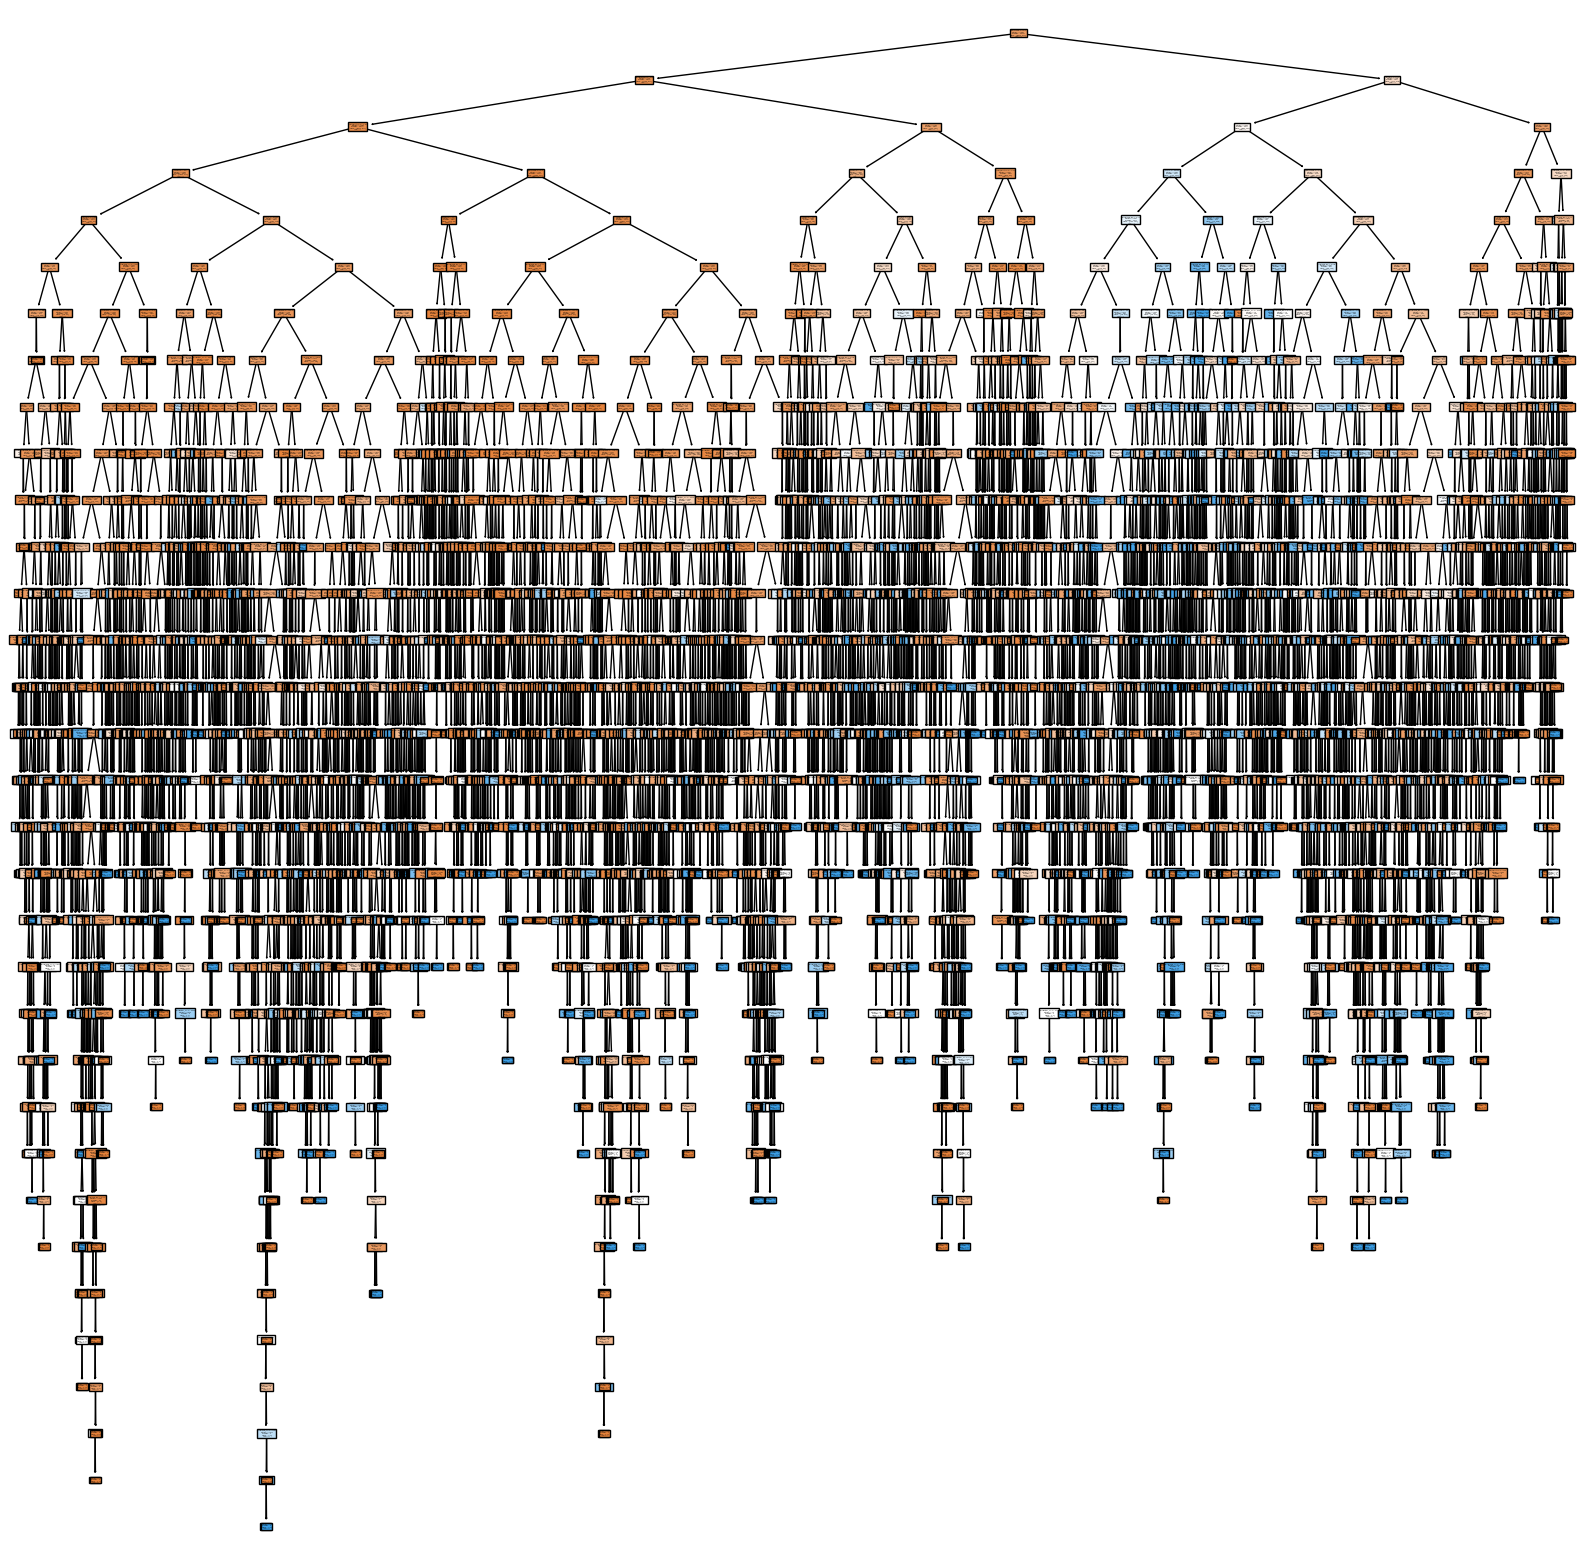

In [15]:
cn = ['0', '1']
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, class_names = cn,  filled=True)

Cet arbre de forêt montre tous les chemins possibles qui permettent de classifier les données. Pour une instanciation, chaque choix permet de sucessivement classer les données en fonction de seuil de détermination.
Un tel arbre n'est pas facile à interpréter car il y a autant de chemins possible qu'il existe de variables. Nous avons ainsi utilisé un modèle plus simple avec une faible profondeur (3).

## 2.2. Instanciation d'un Random Forest Classifier avec une profondeur de 3 <a name="2.2"></a>
[return to the plan](#2) 

In [16]:

rfc = RandomForestClassifier(class_weight= None, criterion = 'entropy', max_features = 'auto', n_estimators = 2000, 
                             max_depth = 3)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


precision = precision_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)


print(f'Accuracy =: {round(rfc.score(X_train, y_train) * 100, 2)}%')

print(f'Accuracy =: {round(rfc.score(X_test, y_test) * 100, 2)}%')

print ('--')


print ('ROC Score is', roc)
print ('--')
print ('Recall Score is ', recall)
print ('--')
print ('Confusion Matrix\n\n', cm)

Accuracy =: 84.38%
Accuracy =: 84.45%
--
ROC Score is 0.5098192134925823
--
Recall Score is  0.019965277777777776
--
Confusion Matrix

 [[12234     4]
 [ 2258    46]]


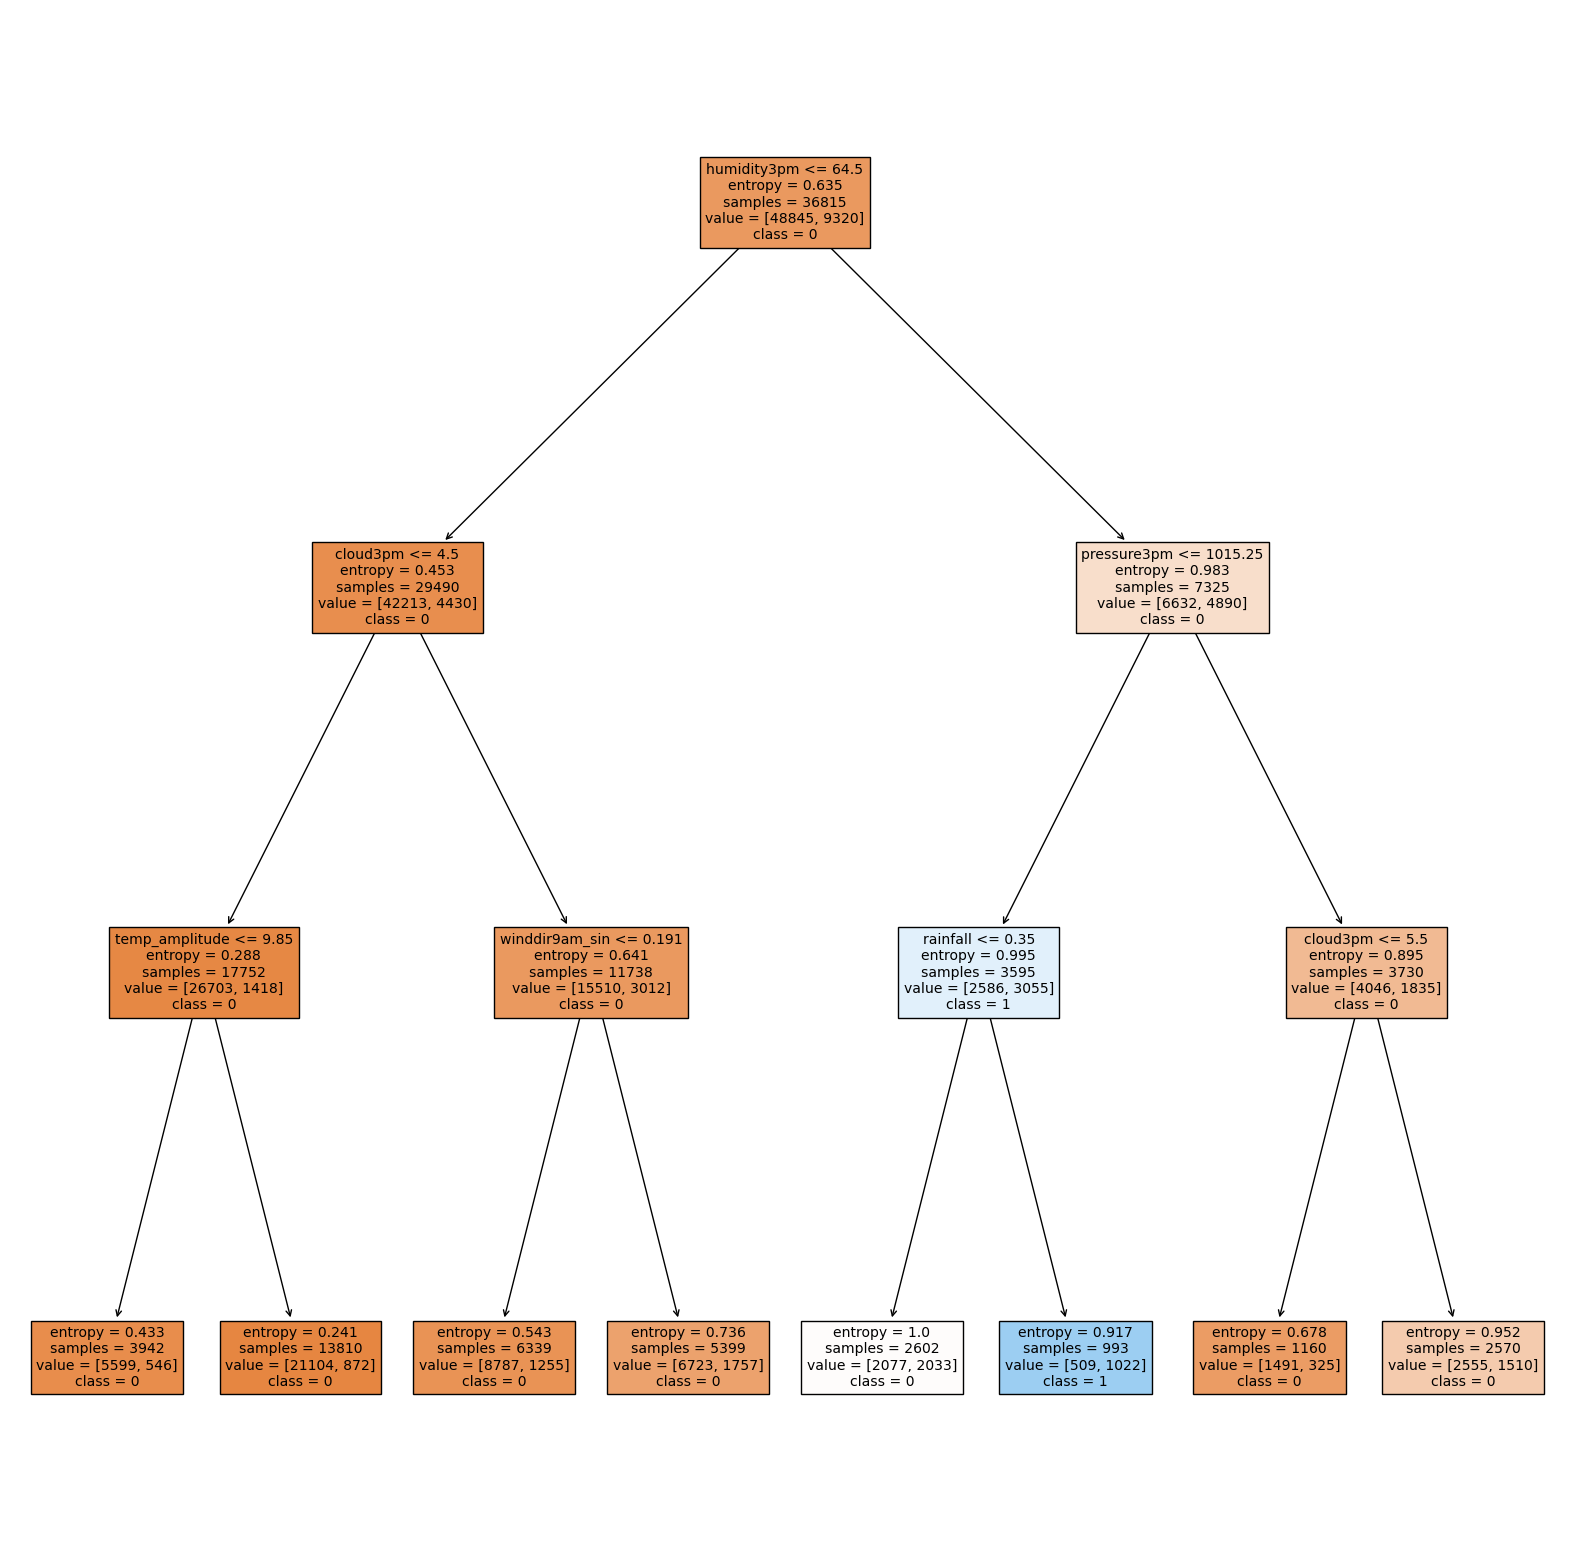

In [17]:
cn = ['0', '1']
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, class_names = cn,  filled=True)

Il est possible d’interpréter un tel arbre en indiquant que la variable la plus importante du modèle est l'humidité à 15h, qui va déterminer en premier lieu la classification. En-dessous d’un score à 64.5, le modèle classifie la donnée pour vérifier la couverture nuageuse à 15h. Au fur et à mesure, le modèle choisit et dirige vers d’autres variables pour obtenir une classe finale. C’est bien la limite de la dimensionalité, car plus il y a de dimensions, plus il y a de possibilités et de ramifications. C’est arbre correspond au choix de la première itération : la première classification.

# 3. XGBOOST<a name="3"></a>
[return to the plan](#0)  

XGBoost est particulièrement adapté aux problèmes de classification et offre de meilleures performances et une précision accrue par rapport aux autres algorithmes de Gradient Boosting.¶
XGBoost utilise une parallélisation pour entraîner les arbres, inclut des termes de régularisation dans sa fonction de coût pour éviter le surapprentissage (overfitting) et est capable de gérer des données manquantes en trouvant automatiquement la meilleure direction pour les observations manquantes.


> 3.1 [Instanciation du XGBOOST](#3.1)  
> 3.2 [Interprétation avec Shap](#3.2)   
> 3.3 [Interprétation avec Lime](#3.3) 

## 3.1. Instanciation du XGBOOST <a name="3.1"></a>
[return to the plan](#3) 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [21]:
xgb_model = XGBClassifier(n_estimators=1000, max_depth=6, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb_model.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_val, y_val)], verbose=False)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

print(classification_report(y_test,y_pred,digits=5))

Test accuracy: 0.8892174391417962
              precision    recall  f1-score   support

           0    0.90527   0.96985   0.93645     12238
           1    0.74214   0.46094   0.56867      2304

    accuracy                        0.88922     14542
   macro avg    0.82370   0.71539   0.75256     14542
weighted avg    0.87942   0.88922   0.87818     14542



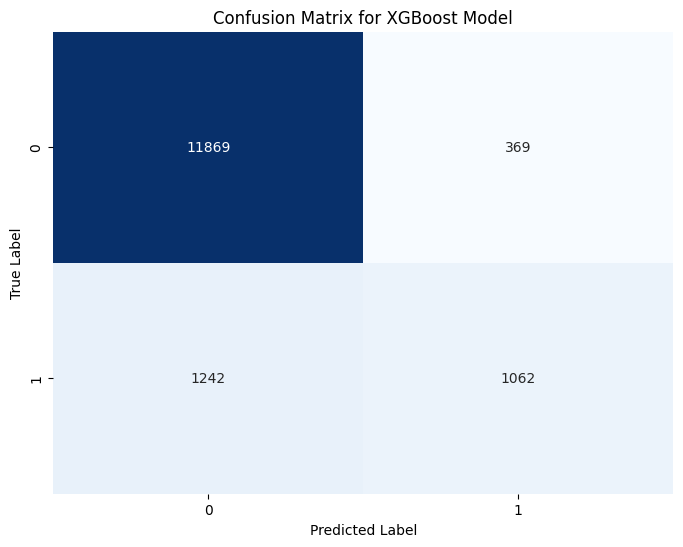

In [23]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion en tant que heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

Nous obtenons ici un accuracy de 88.92%, ce qui est meilleur que les modèles précédents. Le F1-score pour la classe 1 est ici de 56.87%, ce qui est mieux que les autres modèles. Le rappel est de 46% pour la classe 1.

## 3.2. Interprétation avec Shap <a name="3.2"></a>
[return to the plan](#3) 

In [24]:
import shap
# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
print('Expected Value:', explainer.expected_value)

Expected Value: -1.826629


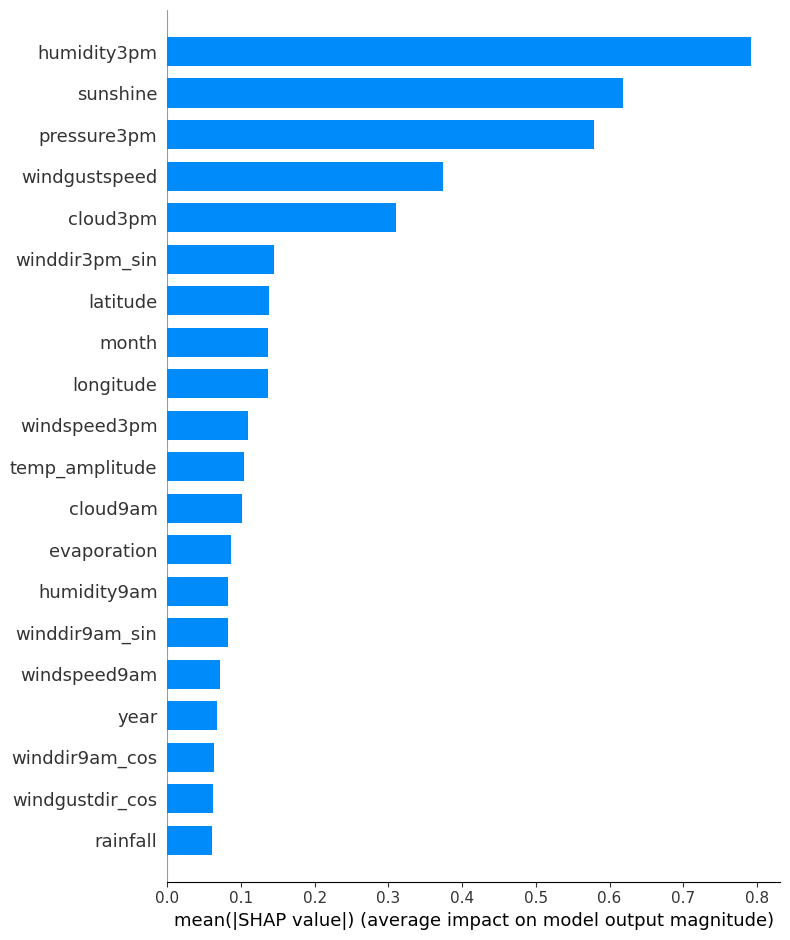

In [25]:
shap.summary_plot(shap_values, X_test, feature_names= X.columns.tolist(), plot_type="bar")

Cette figure nous indique que l’humidité à 15h est la variable la plus importante pour classifier les données. Les variables sunshine (degré d’ensoleillement), pressure 3pm (pression atmosphérique à 15h), windgustspeed (vitesse de pointe du vent) et cloud 3pm (couverture nuageuse à 15h) sont également importantes. 

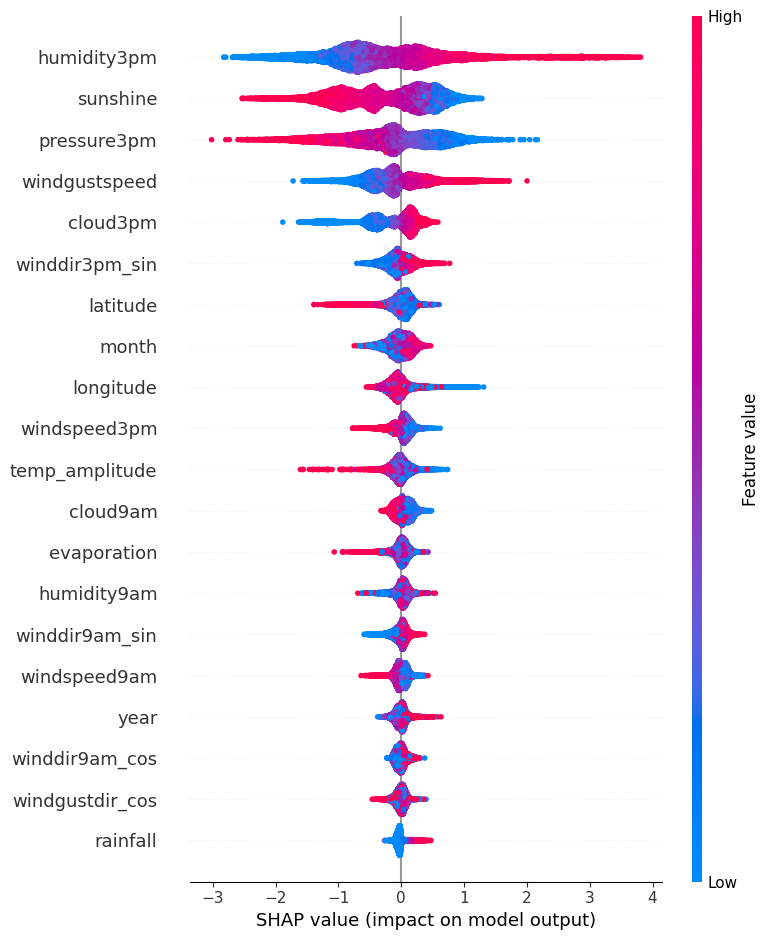

In [26]:
shap.summary_plot(shap_values, X_test , feature_names= X.columns.tolist())

Ici, une couleur rouge indique la propension à classifier une donnée dans la classe 1 : jour de pluie, tandis que la couleur rouge indique la classe 1. Par exemple, une valeur élevée pour la variable « humidité à 15h » nous indique que l’humidité est élevée, et que le modèle aura tendance à classer cette observation dans la classe 1. A l’inverse, un score faible dans cette variable (bleu) nous indique une humidité faible et que le modèle risque de classer notre observation dans classe 0. Nous pouvons interpréter chaque variable ainsi.

## 3.3. Interprétation avec Lime <a name="3.3"></a>
[return to the plan](#3) 

In [28]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['0', '1'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=xgb_model.predict_proba
)

exp.show_in_notebook(show_table=True)

In [29]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[23], 
    predict_fn=xgb_model.predict_proba
)

exp.show_in_notebook(show_table=True)

La librairie Lime permet aussi de comparer des observations uniques. Par exemple, ici sur les deux figures ci-dessus, il est possible de remarquer que l’observation 1 avait 95% de chance d’être classée dans la classe 0, et 74% pour l’observation 23. La libraire permet d’indiquer les valeurs critiques de chaque variable que le modèle a spécifié pour déterminer l’appartenance à une classe ou à une autre. La couleur orange spécifie les valeurs obtenues par les observations qui dépassent le seuil de validité d’appartenance à la classe 1. Les valeurs de chaque observation unique sont affichées dans la colonne de droite.

# 4. Réseau de neurones<a name="4"></a>
[return to the plan](#0)  

> 4.1 [Instanciation du réseau de neurones](#4.1)  

## 4.1. Instanciation du réseau de neurones <a name="3.3"></a>
[return to the plan](#3) 

In [30]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam

In [38]:
url = "https://raw.githubusercontent.com/WeatherForecasterTeam/australia_weather_forecasts/main/data/data_features.csv"
df = pd.read_csv(url, index_col=0)

In [39]:
X = df.drop(['raintomorrow'],axis=1)
y = df['raintomorrow']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [41]:
model = Sequential()
model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.9702 - accuracy: 0.8158 - val_loss: 0.4364 - val_accuracy: 0.8409
Epoch 2/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.4488 - accuracy: 0.8388 - val_loss: 0.4431 - val_accuracy: 0.8409
Epoch 3/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.4396 - accuracy: 0.8392 - val_loss: 0.4093 - val_accuracy: 0.8409
Epoch 4/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.4194 - accuracy: 0.8392 - val_loss: 0.3774 - val_accuracy: 0.8409
Epoch 5/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3946 - accuracy: 0.8391 - val_loss: 0.3570 - val_accuracy: 0.8409
Epoch 6/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3822 - accuracy: 0.8404 - val_loss: 0.3571 - val_accuracy: 0.8409
Epoch 7/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3688 - accuracy: 0.8489 - val_loss: 0.3470 - val_ac

1364/1364 [==============================] - 2s 2ms/step - loss: 0.3275 - accuracy: 0.8670 - val_loss: 0.3282 - val_accuracy: 0.8623
Epoch 58/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.8674 - val_loss: 0.3193 - val_accuracy: 0.8694
Epoch 59/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3305 - accuracy: 0.8675 - val_loss: 0.3383 - val_accuracy: 0.8719
Epoch 60/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.3284 - accuracy: 0.8683 - val_loss: 0.3143 - val_accuracy: 0.8681
Epoch 61/100
1364/1364 [==============================] - 3s 2ms/step - loss: 0.3266 - accuracy: 0.8670 - val_loss: 0.3298 - val_accuracy: 0.8600
Epoch 62/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3287 - accuracy: 0.8677 - val_loss: 0.3286 - val_accuracy: 0.8660
Epoch 63/100
1364/1364 [==============================] - 2s 2ms/step - loss: 0.3314 - accuracy: 0.8675 - val_loss: 0.3180 - val_accuracy

In [43]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

455/455 [==============================] - 0s 675us/step - loss: 0.3263 - accuracy: 0.8670
Test loss: 0.3263045847415924
Test accuracy: 0.8670058846473694


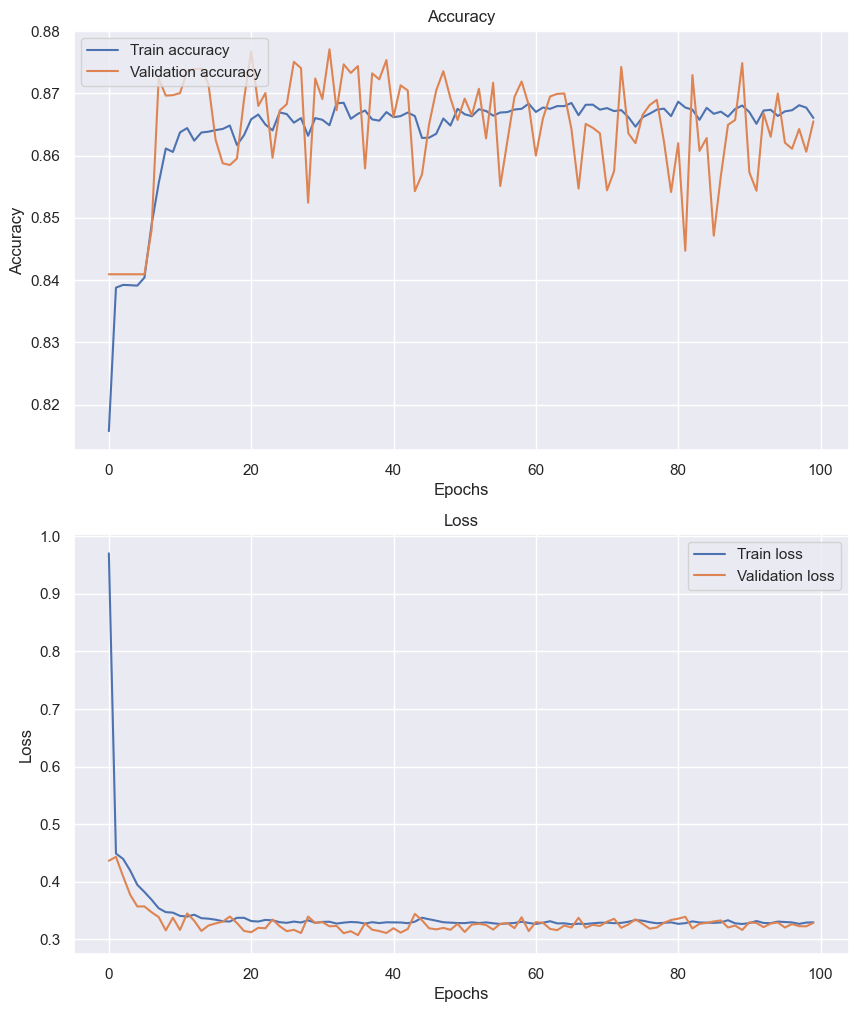

In [44]:
sns.set(style="darkgrid")
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Tracer la précision pour l'entraînement et la validation
ax1.plot(history.history['accuracy'], label='Train accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='upper left')
ax1.set_title('Accuracy')

# Tracer la perte pour l'entraînement et la validation
ax2.plot(history.history['loss'], label='Train loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(loc='upper right')
ax2.set_title('Loss')

plt.show()

Nous avons choisi 100 epochs. Nous obtenons un score d’accuracy de 84%, ce qui n’est pas meilleur que les autres modèles plus simples. La fonction de perte est de 0.44. La validation de l’accuracy suit la même courbe que celle de l’accuracy, ce qui indique que notre modèle ne fait pas de surapprentissage. Ce modèle est en réalité décevant dans le sens où malgré la complexité du modèle, il ne parvient pas à obtenir un score tangiblement supérieur à celui du modèle simple de régression logistique

Bien que les modèles de deep learning (réseau de neurons et XGBOOST) soient plus complexes, ils sont censés pouvoir mieux interpréter les données à leur disposition afin de prédire des jours de pluie. Il est à noter que le modèle de réseau de neurones ne parvient pas à obtenir des scores meilleurs que les modèles plus simples. En revanche, le modèle XGBOOST obtient de bons scores prédictifs. Il est le seul à pouvoir prédire 1000 jours de pluie dans le jeu de données, et atteint un score d’accuracy de presque 89%.

# Conclusion <a name="1"></a>
[return to the plan](#0)  

L’étude de ce jeu de données nous a amené à réaliser diverses modélisations, de modèles simples (régression logistique) vers des modèles plus complexes (réseau de neurones).
    
Nous avons appris que le Random Forest Classifier permettait d’obtenir les scores les plus intéressants en termes de métriques. Par ailleurs, l’explication de ce modèle peut être réalisée grâce à un arbre de décision. Cependant, celui-ci peut être complexe à interpréter du fait du nombre important de dimensions. Le XGBoost parvient tout de même à être facilement interprétable. L’interprétation des modèles est souvent un problème pour les modèles plus complexes de machine learning (la fameuse black box). De même, les temps de process peuvent être longs sur des modèles de type SVM ou Random Forest, tandis qu’une régression logistique est plus rapide.
    
La question se pose donc dans le cas d’un jeu de données comme le nôtre : quelle est la meilleure façon de traiter les données ? Nous avons réussi à obtenir de meilleurs scores avec des modèles Random Forest et XGBoost, mais pour quel gain final en termes d’explication ?
    
En revanche, l’utilisation de différents modèles selon les régions climatiques permet de mieux spécifier les données et de pouvoir atteindre des scores plus pertinents. Ici encore, la mise en place de tels modèles requiert du temps de process qui peut être long.
    
Finalement, nous sommes à la croisée des chemins en termes de décision : faut-il maximiser l’efficience et utiliser un modèle plus simple pour décrire les données, ou alors permettre d’avoir des modèles plus précis au détriment du temps de process ?
    
Par ailleurs, en fonction de l’utilité de la précision, il sera préférable de conserver tel ou tel modèle, en fonction de la métrique l’on souhaite maximiser, et si l’on préfère maximiser des faux négatifs ou des faux positifs.
